In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hrtest=pd.read_csv('test_2umaH9m.csv')

In [3]:
hrtrain=pd.read_csv('train_LZdllcl.csv')

In [4]:
hrtrain.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
hrtrain.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [6]:
hrtrain.shape

(54808, 14)

In [7]:
hrtrain.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [8]:
#checking which columns including in the data set
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [9]:
#checking missing values in test data
hrtest.isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [10]:
#checking missing values in train data
hrtrain.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
employee_id                0
department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
hrtrain.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [12]:
pd.crosstab(hrtrain.is_promoted,hrtrain.gender)

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [13]:
hrtrain.previous_year_rating.value_counts(dropna=False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

In [14]:
#filling the NaN values with mode i.e 3.0
hrtrain.previous_year_rating=hrtrain.previous_year_rating.fillna(3.0)

In [15]:
hrtrain.previous_year_rating.value_counts(dropna=False)

3.0    22742
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [16]:
hrtrain.education.value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

In [17]:
# filling the NaN values with mode in train data
hrtrain.education=hrtrain.education.fillna("Bachelor's")

In [18]:
# filling the NaN values with mode in test data
hrtest.education=hrtrain.education.fillna("Bachelor's")

In [19]:
hrtrain.education.value_counts(dropna=False)

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [20]:
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [21]:
promotedyes=hrtrain[hrtrain.is_promoted==1]
promotedno=hrtrain[hrtrain.is_promoted==0]

In [22]:
from scipy.stats import ttest_ind

In [23]:
ttest_ind(promotedyes.avg_training_score,promotedno.avg_training_score,equal_var=False)
# SINCE pvalue=7.662329172468838e-291 IS LESS THAN 0.05, REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN avg_training_score and
# is_promoted

Ttest_indResult(statistic=38.82675007357188, pvalue=7.662329172468838e-291)

In [24]:
from scipy.stats import ttest_ind

In [25]:
#conducting ttest between avg training score and gender
hrtrain.avg_training_score.groupby(hrtrain.gender).mean()

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [26]:
male=hrtrain[hrtrain.gender=='m']
female=hrtrain[hrtrain.gender=='f']

In [27]:
ttest_ind(male.avg_training_score,female.avg_training_score,equal_var=False)
# SINCE pvalue=9.321257169457923e-10 IS LESS THAN 0.05, REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN avg_training_score and
# gender

Ttest_indResult(statistic=-6.122262326710493, pvalue=9.321257169457923e-10)

In [28]:
hrtrain.avg_training_score.groupby(hrtrain.education).mean()

education
Bachelor's          63.097446
Below Secondary     64.925466
Master's & above    64.061240
Name: avg_training_score, dtype: float64

In [29]:
#conducting ANOVA test betweem avg_training_score and education
ug=hrtrain[hrtrain.education=="Bachelor's"]
pg=hrtrain[hrtrain.education=="Master's & above"]
bs=hrtrain[hrtrain.education=="Below Secondary"]

In [30]:
from scipy.stats import f_oneway

In [31]:
f_oneway(ug.avg_training_score,pg.avg_training_score, bs.avg_training_score)
# SINCE pvalue=2.873996658407989e-15 IS LESS THAN 0.05, REJECT NULL
# NULL - THERE IS NO SIGNFICANT DIFFERENCE IN avg_training_score and
#education

F_onewayResult(statistic=33.5035375621275, pvalue=2.873996658407989e-15)

In [32]:
pd.crosstab(hrtrain.is_promoted,hrtrain.gender)

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [33]:
from scipy.stats import chi2_contingency

In [34]:
chi2_contingency(pd.crosstab(hrtrain.is_promoted,hrtrain.gender))
# Since p-value=0.00976509 is less than 0.05, Reject null
#NULL - there is no association between is_promoted and gender

(6.677254566546107,
 0.009765091521176657,
 1,
 array([[14922.70617428, 35217.29382572],
        [ 1389.29382572,  3278.70617428]]))

In [35]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [36]:
# splitting object columns 
objectcolumns=hrtrain[['department', 'region', 'education', 'gender',
       'recruitment_channel','previous_year_rating',
                      'KPIs_met >80%', 'awards_won?','is_promoted']]

In [37]:
#splitting numeric columns
numericcolumns=hrtrain[['no_of_trainings', 'age','avg_training_score','length_of_service']]

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le=LabelEncoder()

In [40]:
#label encode or dummy variable encoding  of objectcolumnsdummy
objectscolumnsdummy=objectcolumns.apply(le.fit_transform)

In [41]:
hrtraindf=pd.concat([numericcolumns,objectscolumnsdummy],axis=1)

In [42]:
hrtraindf.head()

,no_of_trainings,age,avg_training_score,length_of_service,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
0,1,35,49,8,7,31,2,0,2,4,1,0,0
1,1,30,60,4,4,14,0,1,0,4,0,0,0
2,1,34,50,7,7,10,0,1,2,2,0,0,0
3,2,39,50,10,7,15,0,1,0,0,0,0,0
4,1,45,73,2,8,18,0,1,0,2,0,0,0


In [43]:

objectscolumnsdummy.head()

,department,region,education,gender,recruitment_channel,previous_year_rating,KPIs_met >80%,awards_won?,is_promoted
0,7,31,2,0,2,4,1,0,0
1,4,14,0,1,0,4,0,0,0
2,7,10,0,1,2,2,0,0,0
3,7,15,0,1,0,0,0,0,0
4,8,18,0,1,0,2,0,0,0


In [44]:
# Split Data into DependentVariable(y) & Independent Variables (X)
y=hrtraindf.is_promoted
X=hrtraindf.drop('is_promoted',axis=1)

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg=LogisticRegression(max_iter=2000)

In [47]:
logregmodel=logreg.fit(X,y)

In [48]:
logregmodel.score(X,y)

0.9172201138519924

In [49]:
logitpredict=logregmodel.predict(X)

In [50]:
pd.crosstab(y, logitpredict)

col_0,0,1
is_promoted,,
0,49948,192
1,4345,323


In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report( y, logitpredict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50140
           1       0.63      0.07      0.12      4668

    accuracy                           0.92     54808
   macro avg       0.77      0.53      0.54     54808
weighted avg       0.90      0.92      0.89     54808



In [53]:
 from sklearn.metrics import plot_roc_curve

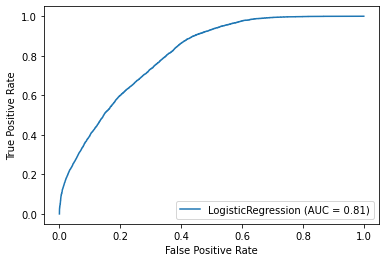

In [54]:
plot_roc_curve(logreg,X,y)

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
tree=DecisionTreeClassifier(max_depth=3)

In [57]:
treemodel=tree.fit(X,y)

In [58]:
treemodel.score(X,y)

0.9231499051233396

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
cross_val_score(tree,X,y,cv=2)

array([0.92150781, 0.9235878 ])

In [61]:
from sklearn.tree import plot_tree

[Text(167.4, 190.26, 'avg_training_score <= 90.5\ngini = 0.156\nsamples = 54808\nvalue = [50140, 4668]'),
 Text(83.7, 135.9, 'KPIs_met >80% <= 0.5\ngini = 0.142\nsamples = 54229\nvalue = [50069, 4160]'),
 Text(41.85, 81.53999999999999, 'awards_won? <= 0.5\ngini = 0.067\nsamples = 35295\nvalue = [34064, 1231]'),
 Text(20.925, 27.180000000000007, 'gini = 0.058\nsamples = 34907\nvalue = [33862, 1045]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.499\nsamples = 388\nvalue = [202, 186]'),
 Text(125.55000000000001, 81.53999999999999, 'avg_training_score <= 88.5\ngini = 0.262\nsamples = 18934\nvalue = [16005, 2929]'),
 Text(104.625, 27.180000000000007, 'gini = 0.257\nsamples = 18717\nvalue = [15883, 2834]'),
 Text(146.475, 27.180000000000007, 'gini = 0.492\nsamples = 217\nvalue = [122, 95]'),
 Text(251.10000000000002, 135.9, 'department <= 0.5\ngini = 0.215\nsamples = 579\nvalue = [71, 508]'),
 Text(209.25, 81.53999999999999, 'avg_training_score <= 93.5\ngini = 0.499\nsamples = 1

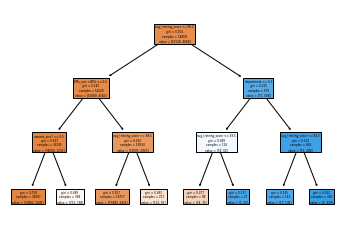

In [62]:
plot_tree(treemodel,filled=True,feature_names=X.columns)

In [63]:
hrtest.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Master's & above,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [64]:
objectcolumns=hrtest[['department', 'region', 'education', 'gender',
       'recruitment_channel','previous_year_rating',
                      'KPIs_met >80%','awards_won?']]

In [65]:
numericcolumns=hrtest[['no_of_trainings', 'age',
                        'avg_training_score','length_of_service']]

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le=LabelEncoder()

In [68]:
testobjectcolsdummy=objectcolumns.apply(le.fit_transform)

In [69]:
y=hrtraindf.is_promoted
X=hrtraindf.drop('is_promoted',axis=1)

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
logreg=LogisticRegression(max_iter=2000)

In [72]:
logregmodel=logreg.fit(X,y)

In [73]:
logregmodel.score(X,y)

0.9172201138519924

In [74]:
logitpredict=logregmodel.predict(X)

In [75]:
pd.crosstab(y,logitpredict)

col_0,0,1
is_promoted,,
0,49948,192
1,4345,323


In [76]:
pd.DataFrame(logregmodel.coef_,columns=X.columns).transpose()

,0
no_of_trainings,-0.192595
age,-0.020879
avg_training_score,0.046101
length_of_service,0.024510
department,0.082508
region,0.002379
education,0.103118
gender,0.011679
recruitment_channel,0.009764
previous_year_rating,0.335042


In [77]:
from sklearn.metrics import classification_report

In [78]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50140
           1       0.63      0.07      0.12      4668

    accuracy                           0.92     54808
   macro avg       0.77      0.53      0.54     54808
weighted avg       0.90      0.92      0.89     54808



In [79]:
from sklearn.metrics import plot_roc_curve

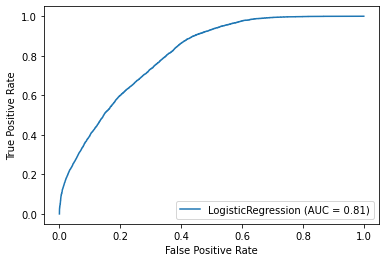

In [80]:
plot_roc_curve(logreg,X,y)

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
tree=DecisionTreeClassifier(max_depth=3)

In [83]:
treemodel=tree.fit(X,y)

In [84]:
treemodel.score(X,y)

0.9231499051233396

In [85]:
##from sklearn.model_selection import cross_val_score

In [86]:
#cross_val_score(tree,X,y,cv=3) # Cross Validation or Repeated Testing

In [87]:
from sklearn.tree import plot_tree

[Text(167.4, 190.26, 'avg_training_score <= 90.5\ngini = 0.156\nsamples = 54808\nvalue = [50140, 4668]'),
 Text(83.7, 135.9, 'KPIs_met >80% <= 0.5\ngini = 0.142\nsamples = 54229\nvalue = [50069, 4160]'),
 Text(41.85, 81.53999999999999, 'awards_won? <= 0.5\ngini = 0.067\nsamples = 35295\nvalue = [34064, 1231]'),
 Text(20.925, 27.180000000000007, 'gini = 0.058\nsamples = 34907\nvalue = [33862, 1045]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.499\nsamples = 388\nvalue = [202, 186]'),
 Text(125.55000000000001, 81.53999999999999, 'avg_training_score <= 88.5\ngini = 0.262\nsamples = 18934\nvalue = [16005, 2929]'),
 Text(104.625, 27.180000000000007, 'gini = 0.257\nsamples = 18717\nvalue = [15883, 2834]'),
 Text(146.475, 27.180000000000007, 'gini = 0.492\nsamples = 217\nvalue = [122, 95]'),
 Text(251.10000000000002, 135.9, 'department <= 0.5\ngini = 0.215\nsamples = 579\nvalue = [71, 508]'),
 Text(209.25, 81.53999999999999, 'avg_training_score <= 93.5\ngini = 0.499\nsamples = 1

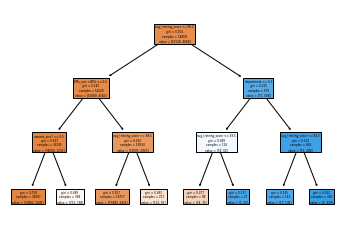

In [88]:
plot_tree(treemodel,filled=True,feature_names=X.columns)

In [89]:
hrtest.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Master's & above,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [90]:
objectcolumns=hrtest[['department', 'region', 'education', 'gender',
       'recruitment_channel','previous_year_rating',
                      'KPIs_met >80%', 'awards_won?']]

In [91]:
numericcolumns=hrtest[['no_of_trainings', 'age',
                        'avg_training_score','length_of_service']]

In [92]:
testobjectcolsdummy=objectcolumns.apply(le.fit_transform)

In [93]:
hrtestdf=pd.concat([numericcolumns,testobjectcolsdummy],axis=1)

In [94]:
logitpredict=logregmodel.predict(hrtestdf)

In [95]:
pd.DataFrame(logitpredict).to_csv('logit.csv')#score=0.13457943925233642

In [96]:
treepredict=treemodel.predict(hrtestdf)

In [97]:
pd.DataFrame(treepredict).to_csv('tree.csv')#score= 0.18388195232690124

# random forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
RF=RandomForestClassifier(n_estimators=500)

In [100]:
RFmodel=RF.fit(X,y)

In [101]:
RFmodel.score(X,y)

0.999744562837542

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
cross_val_score(RF,X,y,cv=3)

array([0.93437329, 0.93267283, 0.93475286])

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

In [105]:
gbm=GradientBoostingClassifier(n_estimators=1000)

In [106]:
gbmmodel=gbm.fit(X,y)

In [107]:
gbmmodel.score(X,y)

0.9449350459786893

In [108]:
cross_val_score(gbm,X,y,cv=3)

array([0.94137931, 0.94192348, 0.94208769])

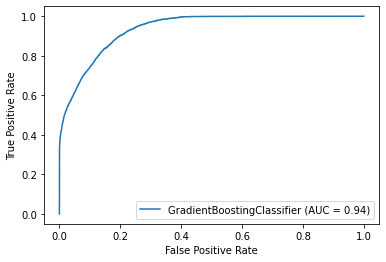

In [109]:
plot_roc_curve(gbm,X,y)

In [110]:
RFpredict=RFmodel.predict(hrtestdf)

In [111]:
pd.DataFrame(RFpredict).to_csv('RF.csv')#score=0.41438032166508987

In [112]:
gbmpredict=gbmmodel.predict(hrtestdf)

In [113]:
pd.DataFrame(gbmpredict).to_csv('gbm.csv')#score= 0.4870848708487085